In [49]:
# -------------------------------------------------------------------
# Comment le contexte social d’un individu influe-t-il sur 
# son bonheur ?
# -------------------------------------------------------------------

# DataSet : World Happiness Report of 2019(Happiness scored according 
# to economic production, social support, etc.) 

In [50]:
import json
import squarify # algorithm for treemap
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
from netgraph import Graph
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt

# > Collect et Nettoyage
---

In [51]:
# Lecture du fichier GeoJson
with open('World.json', encoding='utf8') as f:
    WorldMapJson = json.load(f)

# Création d'un DataFrame avec les pays et les continents pour merge avec les autres df
df_pays_region = pd.DataFrame({
    "Pays": [i['properties']['name'] for i in WorldMapJson['features']],
    "Continent": [i['properties']['continent'] for i in WorldMapJson['features']]
})
df_pays_region["Continent"].unique()

array(['North America', 'South America', 'Asia', 'Africa', 'Europe',
       'Oceania'], dtype=object)

In [52]:
# border dataset
df_border = pd.read_csv("borders.csv")
df_border = df_border.drop(columns=["country_code", "country_border_code"])
df_border = df_border.rename(columns={"country_name": "Pays", "country_border_name": "Pays_voisin"})
df_border.head()

,Pays,Pays_voisin
0,Andorra,France
1,Andorra,Spain
2,United Arab Emirates,Oman
3,United Arab Emirates,Saudi Arabia
4,Afghanistan,China


In [53]:
# 2015 dataset
happiness_2015 = pd.read_csv("2015.csv")
happiness_2015 = pd.merge(left=happiness_2015, right=df_pays_region, left_on='Country or region', right_on='Pays', how='left')
happiness_2015 = happiness_2015.drop(columns=['Pays'])
happiness_2015.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Continent
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Europe
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Europe
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Europe
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Europe
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America


In [54]:
# 2016 dataset
happiness_2016 = pd.read_csv("2016.csv")
happiness_2016 = pd.merge(left=happiness_2016, right=df_pays_region, left_on='Country or region', right_on='Pays', how='left')
happiness_2016 = happiness_2016.drop(columns=['Pays'])
happiness_2016 = happiness_2016.sort_values(by="Overall rank")  # Tri croissant par défaut
happiness_2016.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption,Generosity,Continent
37,1,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,Europe
134,2,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,Europe
57,3,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,Europe
103,4,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,Europe
44,5,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,Europe


In [55]:
# 2017 dataset
happiness_2017 = pd.read_csv("2017.csv")
happiness_2017 = pd.merge(left=happiness_2017, right=df_pays_region, left_on='Country or region', right_on='Pays', how='left')
happiness_2017 = happiness_2017.drop(columns=['Pays'])
happiness_2017.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,Europe
1,2,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,Europe
2,3,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,Europe
3,4,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,Europe
4,5,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,Europe


In [56]:
# 2018 dataset
happiness_2018 = pd.read_csv("2018.csv")
happiness_2018 = pd.merge(left=happiness_2018, right=df_pays_region, left_on='Country or region', right_on='Pays', how='left')
happiness_2018 = happiness_2018.drop(columns=['Pays'])
happiness_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Europe
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Europe
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Europe
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Europe
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Europe


In [57]:
# 2019 dataset
happiness_2019 = pd.read_csv("2019.csv")
happiness_2019 = pd.merge(left=happiness_2019, right=df_pays_region, left_on='Country or region', right_on='Pays', how='left')
happiness_2019 = happiness_2019.drop(columns=['Pays'])
happiness_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [58]:
df_for_analyse = happiness_2019
pays_for_evolution = "Denmark"
happiness_2019["Country or region"] # Liste des pays pour bien remplir le champs du dessus

0                       Finland
1                       Denmark
2                        Norway
3                       Iceland
4                   Netherlands
                 ...           
151                      Rwanda
152                    Tanzania
153                 Afghanistan
154    Central African Republic
155                 South Sudan
Name: Country or region, Length: 156, dtype: object

# Structuration 
---

In [59]:
# Suppresion des pays sans continent
df_region_sans_nan = df_for_analyse.dropna(subset=["Continent"])
df_region_sans_nan.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [60]:
# Tri par continent du df avec les pays sans continent
df_region_sans_nan_and_sort_by_region = df_region_sans_nan.sort_values(by="Continent")
df_region_sans_nan_and_sort_by_region.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
71,72,Libya,5.525,1.044,1.303,0.673,0.416,0.133,0.152,Africa
97,98,Ghana,4.996,0.611,0.868,0.486,0.381,0.245,0.040,Africa
123,124,Tunisia,4.461,0.921,1.000,0.815,0.167,0.059,0.055,Africa
122,123,Mozambique,4.466,0.204,0.986,0.390,0.494,0.197,0.138,Africa
121,122,Mauritania,4.490,0.570,1.167,0.489,0.066,0.106,0.088,Africa


In [61]:
# Création du GeoJson avec les pays que l'on a dans notre df
WorldMap = {"type": "FeatureCollection", "features": []}

rank = happiness_2019["Overall rank"].values
name = happiness_2019["Country or region"].values

nbr = 0 # j'en récupère 132

# Formatage des données du GeoJson pour les pays que l'on a dans un autre GeoJson pour qu'il correspond avec notre df
for i in range (1,len(rank)+1):
    pays = {}
    pays["type"] = "Feature"
    pays["id"] = i
    geo = {}
    for y in range(len(WorldMapJson["features"])):
        if WorldMapJson["features"][y]["properties"]["geounit"] in name[i-1] or name[i-1] in WorldMapJson["features"][y]["properties"]["geounit"]:
            pays["name"] = WorldMapJson["features"][y]["properties"]["geounit"]
            pays["geometry"] = WorldMapJson["features"][y]["geometry"]
            WorldMap["features"].append(pays)
# print(WorldMap)

In [62]:
# filtrage des pays pour lesquels on a des données sur le bonheur
df_border_filtred = df_border[df_border["Pays"].isin(df_for_analyse["Country or region"]) & df_border["Pays_voisin"].isin(df_for_analyse["Country or region"])]
df_border_filtred.head()

,Pays,Pays_voisin
3,United Arab Emirates,Saudi Arabia
4,Afghanistan,China
6,Afghanistan,Pakistan
7,Afghanistan,Tajikistan
8,Afghanistan,Turkmenistan


In [63]:
# Transformation du d'un df à deux colonnes en une liste de tuples
liste_tuples_border = list(zip(df_border_filtred["Pays"], df_border_filtred["Pays_voisin"]))
# liste_tuples_border

In [64]:
# Creation d'un df avec le nombre de pays par continent
df_nbr_pays_pas_continent = pd.DataFrame({
    'nbr_pays_pas_continent':[
        df_region_sans_nan[df_region_sans_nan['Continent'] == 'Europe'].shape[0],
        df_region_sans_nan[df_region_sans_nan['Continent'] == 'Oceania'].shape[0],
        df_region_sans_nan[df_region_sans_nan['Continent'] == 'North America'].shape[0],
        df_region_sans_nan[df_region_sans_nan['Continent'] == 'Asia'].shape[0],
        df_region_sans_nan[df_region_sans_nan['Continent'] == 'South America'].shape[0],
        df_region_sans_nan[df_region_sans_nan['Continent'] == 'Africa'].shape[0]
    ], 
    'Continent':[
        'Eu' + ' (' + str(df_region_sans_nan[df_region_sans_nan['Continent'] == 'Europe'].shape[0]) + ')',
        'Oce' + ' (' + str(df_region_sans_nan[df_region_sans_nan['Continent'] == 'Oceania'].shape[0]) + ')', 
        'NA' + ' (' + str(df_region_sans_nan[df_region_sans_nan['Continent'] == 'North America'].shape[0]) + ')', 
        'Asi' + ' (' + str(df_region_sans_nan[df_region_sans_nan['Continent'] == 'Asia'].shape[0]) + ')', 
        'SA' + ' (' + str(df_region_sans_nan[df_region_sans_nan['Continent'] == 'South America'].shape[0]) + ')',
        'Afri' + ' (' + str(df_region_sans_nan[df_region_sans_nan['Continent'] == 'Africa'].shape[0]) + ')'
    ]
})
print(df_nbr_pays_pas_continent)

   nbr_pays_pas_continent  Continent
0                      37    Eu (37)
1                       2    Oce (2)
2                      10    NA (10)
3                      41   Asi (41)
4                      10    SA (10)
5                      37  Afri (37)


# > Analyse
---

### > Distribution
---

C:\Users\yfour\AppData\Local\Temp\ipykernel_9308\130185749.py:34: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.

c:\Users\yfour\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning:

5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



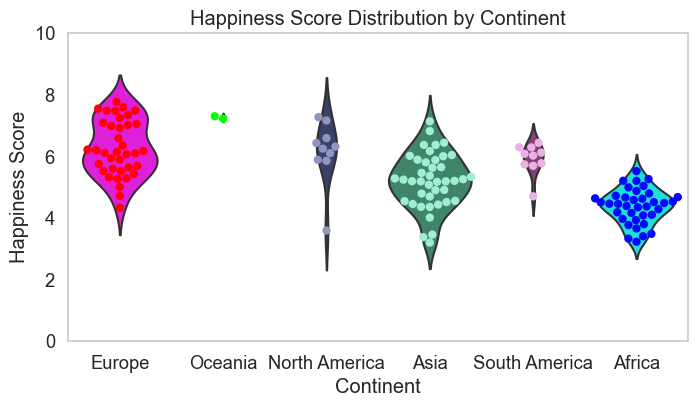

In [65]:

# ['North America', 'South America', 'Asia', 'Africa', 'Europe','Oceania']
swarmplot_palette = {  # Couleurs des points
    'North America':'#8f96bf', 
    'South America':'#ebb0e5', 
    'Asia':'#9feed3', 
    'Africa': '#0006fF', 
    'Europe': '#ff0006', 
    'Oceania': '#06ff00'
}

violin_palette = {  # Couleurs des violons
    'North America':'#333c70', 
    'South America':'#90367c', 
    'Asia':'#34906c', 
    'Africa': '#00fff7', 
    'Europe': '#ff00f7', 
    'Oceania': '#f7ff00'
}

# create figure and seaborn context
sns.set_context('notebook', font_scale=1.2)
fig, ax = plt.subplots(figsize=(8,4))

# Plot the violin
ax = sns.violinplot(
    x=df_region_sans_nan["Continent"],
    y=df_region_sans_nan["Score"],
    palette=violin_palette,
    scale='count',
    inner=None
)

# Plot the swarmplot on top 
ax = sns.swarmplot(
    x=df_region_sans_nan["Continent"],
    y=df_region_sans_nan["Score"],
    color="white", 
    edgecolor="gray",
    s=6, # Circle size
    palette=swarmplot_palette
)

# # Change axis labels, ticks and title
plt.title('Happiness Score Distribution by Continent')
ax.set_xticks([0, 1, 2, 3, 4, 5], ['Europe', 'Oceania', 'North America', 'Asia', 'South America', 'Africa'])
ax.set_xlabel('Continent')
ax.set_ylabel('Happiness Score')
plt.ylim(0, 10)

# Add horizontal grid
ax.grid(axis='y')
ax.set_axisbelow(True)

plt.show()

### > Correlation
---

<Axes: xlabel='Score', ylabel='GDP per capita'>

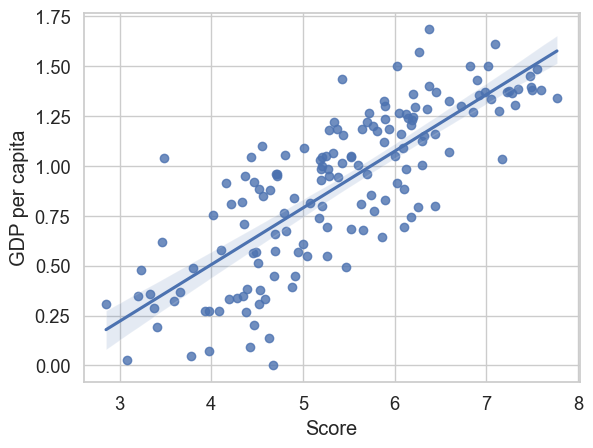

In [66]:
#  Correlation entre le score de bonheur et le PIB par habitant
sns.regplot(x=happiness_2019["Score"], y=happiness_2019["GDP per capita"])
# GDP per capita: PIB par habitant

# -------------------------------------------------------------------
# On peut voir que le revenu moyen par habitant correspond plutôt
# bien au score de chaque pays c'est donc un des points important
# du bonheur d'un individu.
# -------------------------------------------------------------------

### > Map
---

In [67]:
#  Map du score de bonheur par pays

fig = px.choropleth( # Construction du choropleth
    happiness_2019, 
    geojson=WorldMap, 
    locations='Overall rank',
    color='Score',
    color_continuous_scale="Viridis", # "Viridis" "Cividis" "inferno_r" "magma_r" "plasma_r" "inferno_r"
    range_color=(0, 10),
    labels={'Score':'Score'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


fig.update_layout( # Legende
    coloraxis_colorbar=dict(
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside",
    dtick=5
))

fig.show()

# -------------------------------------------------------------------
# On peut voir que le score de bonheur est plutôt élevé dans les pays 
# d'Europe de l'Ouest et en Amérique du Nord qui sont des pays développés.

# On peut voir que le score de bonheur est plutôt bas dans les pays
# d'Afrique et d'Asie qui sont des pays en voie de développement.
# -------------------------------------------------------------------

### > Evolution
---

Evolution des score en fonction du rang du pays

<Axes: >

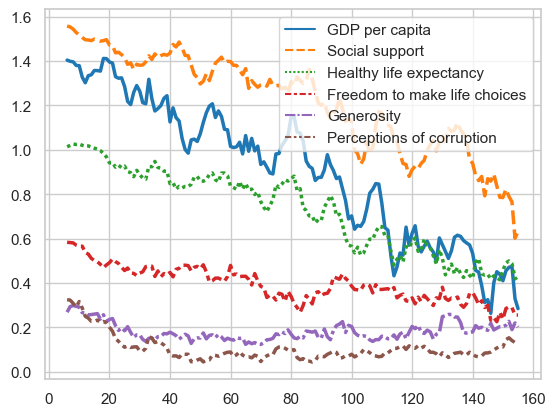

In [68]:
# Evolution des indicateurs de bonheur

sns.set_theme(style="whitegrid")
data = pd.DataFrame(happiness_2019, columns=["GDP per capita", "Social support", "Healthy life expectancy","Freedom to make life choices","Generosity", "Perceptions of corruption"])
data = data.rolling(7).mean()
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

# x = numero du pays dans le classement (1 à 156)
# y = valeur de l'indicateur

# -------------------------------------------------------------------
# On voit que chacune des variables a une influence sur le bonheur des individus 
# car elles descendent toutes en même temps que le renking des pays.
# auquel elles correspondent.
# -------------------------------------------------------------------

<Axes: >

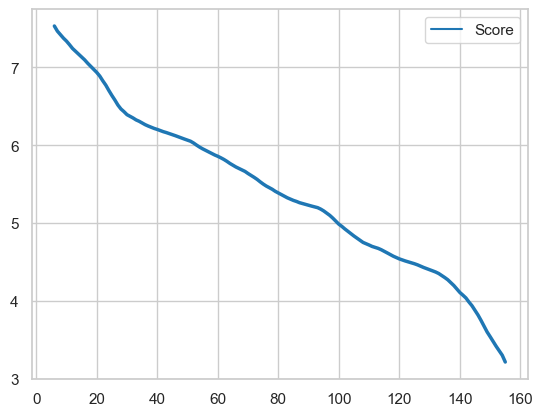

In [69]:
# Evolution du score de bonheur
sns.set_theme(style="whitegrid")
score = pd.DataFrame(happiness_2019, columns=["Score"])
score = score.rolling(7).mean()
sns.lineplot(data=score, palette="tab10", linewidth=2.5)

# -------------------------------------------------------------------
# L'evolution du score est la même que celle des indicateurs de bonheur
# -------------------------------------------------------------------

Evolution du bonheur d'année en année pas pays

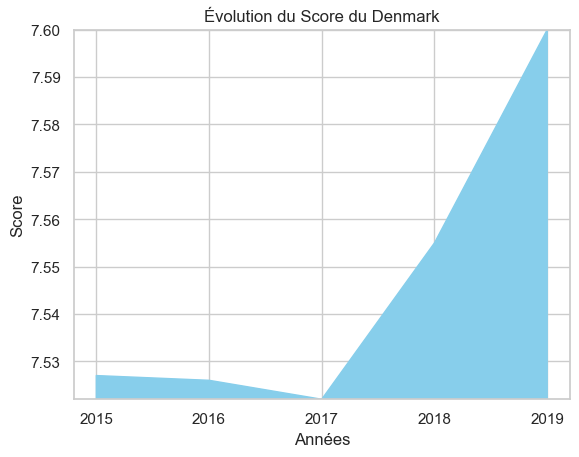

In [70]:
df_evolution = pd.DataFrame({
    "Annees": ["2015", "2016", "2017", "2018", "2019"],
    "Score": [
        happiness_2015[happiness_2015["Country or region"] == pays_for_evolution]["Score"].values[0],
        happiness_2016[happiness_2016["Country or region"] == pays_for_evolution]["Score"].values[0],
        happiness_2017[happiness_2017["Country or region"] == pays_for_evolution]["Score"].values[0],
        happiness_2018[happiness_2018["Country or region"] == pays_for_evolution]["Score"].values[0],
        happiness_2019[happiness_2019["Country or region"] == pays_for_evolution]["Score"].values[0]
    ]
})

plt.stackplot(df_evolution["Annees"], df_evolution["Score"], color="skyblue", alpha=1)
plt.ylim(df_evolution["Score"].min(), df_evolution["Score"].max()) # Ajuster les limites des axes (zoom)

# Ajouter des labels et un titre si nécessaire
plt.xlabel("Années")
plt.ylabel("Score")
plt.title("Évolution du Score du " + pays_for_evolution)

# Afficher le graphique
plt.show()

### > Ranking
---

In [71]:
# Initialisation des fonctions pour le graphique

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 4
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

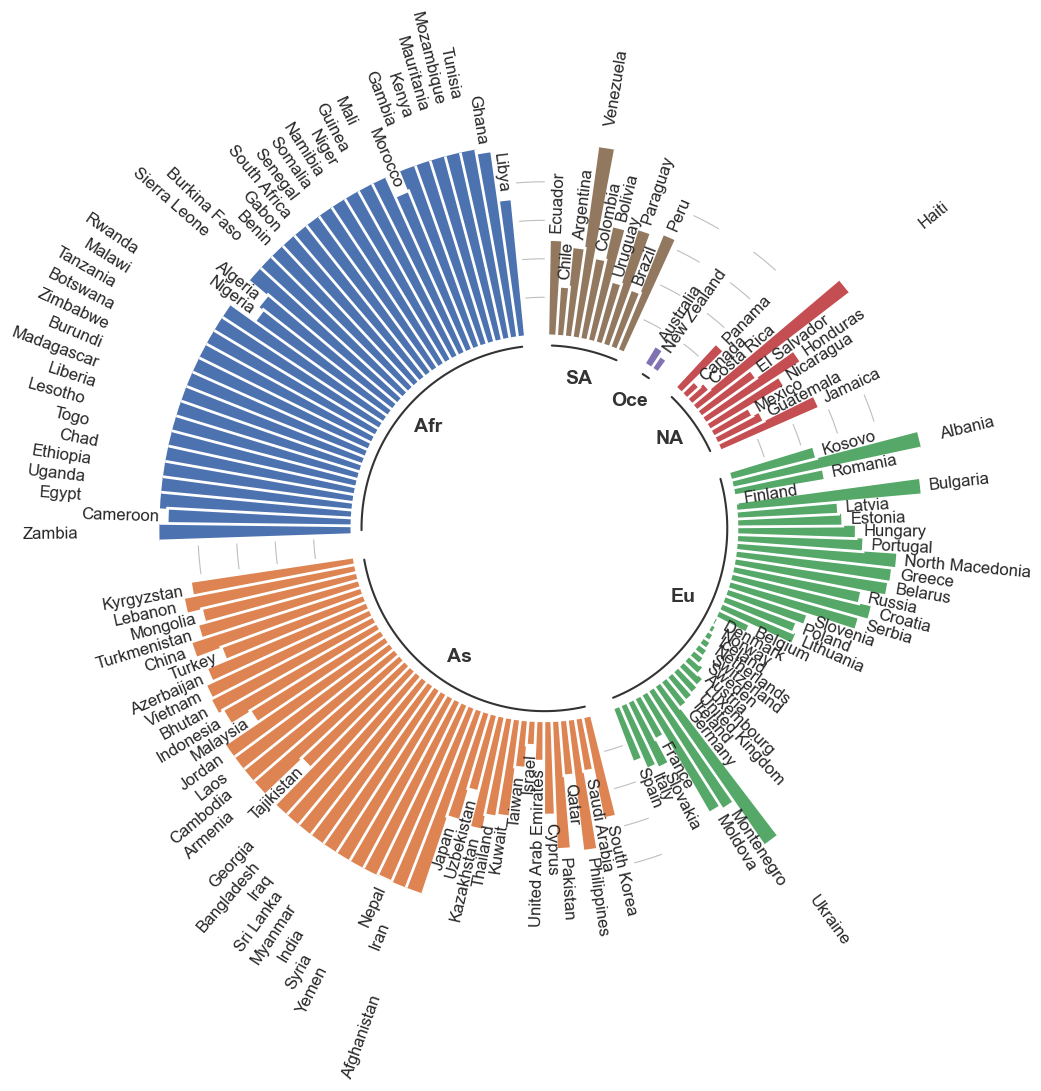

In [72]:
# Affichage du ranking des pays par continent

ANGLES = np.linspace(0, 2 * np.pi, len(df_region_sans_nan_and_sort_by_region), endpoint=False) # Angles for each bar
VALUES = df_region_sans_nan_and_sort_by_region["Overall rank"].values # Values for each bar
LABELS = df_region_sans_nan_and_sort_by_region["Country or region"].values # Labels for each bar
GROUP = df_region_sans_nan_and_sort_by_region["Continent"].values # Grab the group values
GROUPS_UNIQUE = df_region_sans_nan_and_sort_by_region.groupby("Continent").groups.keys()

# Add three empty bars to the end of each group
PAD = 3
ANGLES_N = len(VALUES) + PAD * len(GROUPS_UNIQUE)
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group
GROUPS_SIZE = [len(i[1]) for i in df_region_sans_nan_and_sort_by_region.groupby("Continent")]

# Use different colors for each group!
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-100, 100)

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars to represent ...
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

# Add labels
add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# This iterates over the sizes of the groups adding reference
# lines and annotations.
offset = 0 
for group, size in zip(["Afr", "As", "Eu", "NA", "Oce", "SA"], GROUPS_SIZE):
    # Add line below bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [-5] * 50, color="#333333")
    
    # Add text to indicate group
    ax.text(
        np.mean(x1), -20, group, color="#333333", fontsize=14, 
        fontweight="bold", ha="center", va="center"
    )
    
    # Add reference lines at 20, 40, 60, and 80
    x2 = np.linspace(ANGLES[offset], ANGLES[offset + PAD - 1], num=50)
    ax.plot(x2, [20] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [40] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [60] * 50, color="#bebebe", lw=0.8)
    ax.plot(x2, [80] * 50, color="#bebebe", lw=0.8)
    
    offset += size + PAD

### > Flow
---

In [73]:

# Création du graphe
G = nx.Graph()

G.add_edges_from(liste_tuples_border)

# Position des nœuds avec l'algorithme Spring Layout
pos = nx.spring_layout(G, seed=42)

# Extraire les positions des nœuds
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]

# Extraire les arêtes pour les afficher sous forme de lignes
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_y.append(y0)
    edge_y.append(y1)

# Création de la trace pour les arêtes
edges_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    mode='lines',
    line=dict(width=0.5, color='gray'),
    hoverinfo='none'
)

# Création de la trace pour les nœuds
nodes_trace = go.Scatter(
    x=x_nodes,
    y=y_nodes,
    mode='markers+text',
    text=[str(node) for node in G.nodes()],
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=20,
        color=[len(list(G.neighbors(node))) for node in G.nodes()],
        colorbar=dict(thickness=15, title='Node Connections', xanchor='left', titleside='right')
    ),
    textposition="bottom center"
)

# Ajouter les traces pour les arêtes et les nœuds à la figure
fig = go.Figure(data=[edges_trace, nodes_trace])

# Paramètres de mise en page pour l'interactivité
fig.update_layout(
    title="Pays et leurs frontières",
    showlegend=False,
    hovermode='closest',
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    plot_bgcolor='white',
    margin=dict(l=0, r=0, t=40, b=0),
    dragmode='zoom'  # Permet le zoom et le déplacement
)

# Affichage du graphique
fig.show()

### > Part of
---

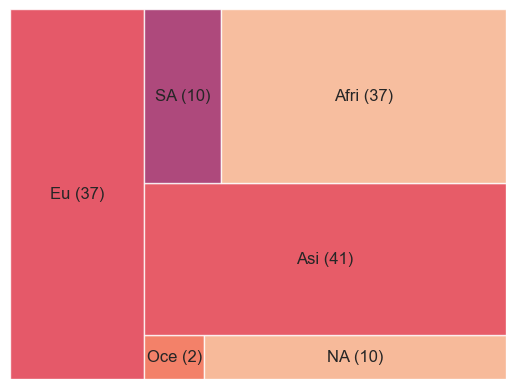

In [75]:
# TreeMap du nombre de pays par continent
squarify.plot(sizes=df_nbr_pays_pas_continent['nbr_pays_pas_continent'], label=df_nbr_pays_pas_continent['Continent'], alpha=.8 )
plt.axis('off')
plt.show()